In [4]:
import numpy as np
import pandas as pd

In [5]:
icu_demo_ce = pd.read_csv('icu_demo_ce.csv')

In [6]:
icu_demo_ce.head()

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,duration,gender,age,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
0,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266,0 days 09:50:47,F,52,47007.0,2180-07-23 22:00:00,2180-07-23 22:15:00,220045.0,94.0,94.0,bpm,0.0
1,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266,0 days 09:50:47,F,52,66056.0,2180-07-23 19:00:00,2180-07-23 19:59:00,220045.0,97.0,97.0,bpm,0.0
2,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266,0 days 09:50:47,F,52,66056.0,2180-07-23 20:00:00,2180-07-23 21:01:00,220045.0,100.0,100.0,bpm,0.0
3,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266,0 days 09:50:47,F,52,66056.0,2180-07-23 21:00:00,2180-07-23 21:01:00,220045.0,94.0,94.0,bpm,0.0
4,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266,0 days 09:50:47,F,52,88981.0,2180-07-23 14:12:00,2180-07-23 14:17:00,220045.0,91.0,91.0,bpm,0.0


In [7]:
sorted_icu_demo_ce = icu_demo_ce.sort_values(by='charttime')

In [8]:
sorted_icu_demo_ce['hadm_id'].unique()[1:100]

array([23542772, 23864737, 23883987, 28977824, 28768907, 28453791,
       20446666, 23294937, 22461053, 22277686, 22602515, 24403955,
       25971308, 23067084, 29403422, 21650344, 22626086, 25397565,
       28144730, 20605586, 28605254, 28048175, 21010085, 26314633,
       25117070, 25661012, 22651481, 26290668, 29534931, 20678397,
       27958917, 20690213, 22811618, 21409169, 28596000, 26646296,
       24532041, 20342223, 25725040, 27250521, 28881963, 20122533,
       29355007, 28221328, 20480421, 27652727, 25131415, 25017661,
       21962793, 20688923, 25722919, 21569236, 26521384, 21320294,
       25257503, 26614214, 25115991, 26679970, 27705504, 21021060,
       27679158, 24479558, 28793008, 25247849, 27981586, 25610841,
       23750420, 23390811, 26819382, 29034596, 20619236, 24046530,
       24792917, 20331360, 21191169, 28634726, 24691841, 29770173,
       20711347, 21550725, 27361807, 24966078, 23068082, 22305767,
       24380644, 27565790, 26076340, 22207947, 29919541, 29605

In [9]:
sorted_icu_demo_ce[sorted_icu_demo_ce['hadm_id']==23542772]['itemid'].unique() #example of encounter with only hr

array([220045.])

In [10]:
sorted_icu_demo_ce[sorted_icu_demo_ce['hadm_id']==23864737]['itemid'].unique() #example of encounter with all vital signs (hr, sbp, and dbp)

array([220045., 220050., 220051.])

In [11]:
# Filtering the first two observations for each features (sorted by charttime)
filtered_df = icu_demo_ce[icu_demo_ce.sort_values(by='charttime').groupby(['subject_id', 'hadm_id', 'stay_id','itemid'])['value'].cumcount() < 2]
filtered_df.head()

<ipython-input-11-f3a3e4b671ce>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = icu_demo_ce[icu_demo_ce.sort_values(by='charttime').groupby(['subject_id', 'hadm_id', 'stay_id','itemid'])['value'].cumcount() < 2]


,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,duration,gender,age,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
4,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266,0 days 09:50:47,F,52,88981.0,2180-07-23 14:12:00,2180-07-23 14:17:00,220045.0,91.0,91.0,bpm,0.0
5,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266,0 days 09:50:47,F,52,88981.0,2180-07-23 14:30:00,2180-07-23 14:43:00,220045.0,93.0,93.0,bpm,0.0
10,10000980,26913865,39765666,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2189-06-27 08:42:00,2189-06-27 20:38:27,0.497535,0 days 11:56:27,F,76,36518.0,2189-06-27 08:56:00,2189-06-27 09:07:00,220045.0,77.0,77.0,bpm,0.0
11,10000980,26913865,39765666,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2189-06-27 08:42:00,2189-06-27 20:38:27,0.497535,0 days 11:56:27,F,76,36518.0,2189-06-27 09:04:00,2189-06-27 09:07:00,220045.0,75.0,75.0,bpm,0.0
37,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032,1 days 02:49:58,F,55,84976.0,2157-11-20 19:19:00,2157-11-20 19:30:00,220045.0,86.0,86.0,bpm,0.0


In [12]:
# filter observations with > 24 hrs LOS
above_24_hr_filter = filtered_df[filtered_df['los'] >= 1]

In [13]:
above_24_hr_filter.head()

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,duration,gender,age,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
37,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032,1 days 02:49:58,F,55,84976.0,2157-11-20 19:19:00,2157-11-20 19:30:00,220045.0,86.0,86.0,bpm,0.0
38,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032,1 days 02:49:58,F,55,84976.0,2157-11-20 20:00:00,2157-11-20 22:18:00,220045.0,91.0,91.0,bpm,0.0
77,10001725,25563031,31205490,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2110-04-11 15:52:22,2110-04-12 23:59:56,1.338588,1 days 08:07:34,F,46,22280.0,2110-04-11 15:54:00,2110-04-11 16:03:00,220045.0,55.0,55.0,bpm,0.0
78,10001725,25563031,31205490,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2110-04-11 15:52:22,2110-04-12 23:59:56,1.338588,1 days 08:07:34,F,46,22280.0,2110-04-11 16:00:00,2110-04-11 16:02:00,220045.0,86.0,86.0,bpm,0.0
245,10001884,26184834,37510196,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-01-11 04:20:05,2131-01-20 08:27:30,9.171817,9 days 04:07:25,F,77,64480.0,2131-01-11 04:22:00,2131-01-11 05:50:00,220045.0,38.0,38.0,bpm,0.0


In [156]:
lab_ce_icu_stay = pd.merge(above_24_hr_filter, bnp_hdl_chol_glu_lab[["subject_id","hadm_id","valuenum","itemid", "charttime"]], on=["subject_id", "hadm_id"], how='inner', suffixes=("_ce", "_lab"))

In [163]:
lab_ce_icu_stay.shape

(3695652, 22)

In [169]:
lab_ce_icu_stay.columns

Index(['subject_id', 'hadm_id', 'stay_id', 'first_careunit', 'last_careunit',
       'intime', 'outtime', 'los', 'duration', 'gender', 'age', 'caregiver_id',
       'charttime_ce', 'storetime', 'itemid_ce', 'value', 'valuenum_ce',
       'valueuom', 'warning', 'valuenum_lab', 'itemid_lab', 'charttime_lab'],
      dtype='object')

In [172]:
from datetime import datetime, timedelta

lab_ce_icu_stay['charttime_lab'] = pd.to_datetime(lab_ce_icu_stay['charttime_lab'])
lab_ce_icu_stay['intime'] = pd.to_datetime(lab_ce_icu_stay['intime'])
lab_ce_icu_stay['outtime'] = pd.to_datetime(lab_ce_icu_stay['outtime'])
lab_ce_icu_stay = lab_ce_icu_stay[lab_ce_icu_stay['charttime_lab'] >= lab_ce_icu_stay['intime'] - timedelta(days=30)]
lab_ce_icu_stay = lab_ce_icu_stay[lab_ce_icu_stay['charttime_lab'] <= lab_ce_icu_stay['outtime']]

In [173]:
lab_ce_icu_stay.shape

(2383953, 22)

In [201]:
lab_ce_icu_stay[["itemid_lab","charttime_lab","intime","valuenum_lab"]].head()

,itemid_lab,charttime_lab,intime,valuenum_lab
0,50931,2157-11-20 13:30:00,2157-11-20 19:18:02,112.0
1,50931,2157-11-21 03:16:00,2157-11-20 19:18:02,113.0
5,50931,2157-11-20 13:30:00,2157-11-20 19:18:02,112.0
6,50931,2157-11-21 03:16:00,2157-11-20 19:18:02,113.0
10,50931,2110-04-11 18:02:00,2110-04-11 15:52:22,146.0


In [204]:
lab_ce_icu_30days_id = set(lab_ce_icu_stay["hadm_id"])

In [206]:
len(lab_ce_icu_30days_id)

52755

In [210]:
lab_ce_icu_30days_id = list(lab_ce_icu_30days_id)

In [212]:
lab_ce_icu_30days_id[0:5]

[24903681, 24510466, 27262979, 25034757, 29622279]

In [14]:
# First, create a new DataFrame with the average of the first two observations of 'value' for each group
average_df = above_24_hr_filter.groupby(['subject_id', 'hadm_id', 'stay_id','itemid'])['value'].mean().reset_index()

# You can also include other columns if needed by merging with the original DataFrame
result_df = average_df.merge(above_24_hr_filter[['subject_id', 'hadm_id', 'stay_id', 'age', 'gender', 'los']], on=['subject_id', 'hadm_id', 'stay_id'], how='left')

# Drop any duplicate rows (if necessary)
result_df = result_df.drop_duplicates()

# Print the result
result_df.head()


,subject_id,hadm_id,stay_id,itemid,value,age,gender,los
0,10001217,24597018,37067082,220045.0,88.5,55,F,1.118032
2,10001725,25563031,31205490,220045.0,70.5,46,F,1.338588
4,10001884,26184834,37510196,220045.0,49.0,77,F,9.171817
6,10002013,23581541,39060235,220045.0,84.0,57,F,1.314352
12,10002013,23581541,39060235,220050.0,112.0,57,F,1.314352


In [15]:
item_id = pd.read_csv('icu/d_items.csv.gz')

In [16]:
result_df = pd.merge(result_df, item_id[["itemid","label","unitname"]], on="itemid", how="inner")

In [17]:
# hr resutls
result_df[result_df['itemid']==220045].head()

,subject_id,hadm_id,stay_id,itemid,value,age,gender,los,label,unitname
0,10001217,24597018,37067082,220045.0,88.5,55,F,1.118032,Heart Rate,bpm
1,10001725,25563031,31205490,220045.0,70.5,46,F,1.338588,Heart Rate,bpm
2,10001884,26184834,37510196,220045.0,49.0,77,F,9.171817,Heart Rate,bpm
3,10002013,23581541,39060235,220045.0,84.0,57,F,1.314352,Heart Rate,bpm
4,10002155,23822395,33685454,220045.0,75.5,81,F,6.178912,Heart Rate,bpm


In [18]:
# sbp results
result_df[result_df['itemid']==220050].head()

,subject_id,hadm_id,stay_id,itemid,value,age,gender,los,label,unitname
57733,10002013,23581541,39060235,220050.0,112.0,57,F,1.314352,Arterial Blood Pressure systolic,mmHg
57734,10002155,23822395,33685454,220050.0,114.0,81,F,6.178912,Arterial Blood Pressure systolic,mmHg
57735,10002348,22725460,32610785,220050.0,113.5,77,F,9.792512,Arterial Blood Pressure systolic,mmHg
57736,10002428,23473524,35479615,220050.0,148.0,81,F,10.977222,Arterial Blood Pressure systolic,mmHg
57737,10002428,28662225,38875437,220050.0,104.5,81,F,7.032894,Arterial Blood Pressure systolic,mmHg


In [19]:
# dbp results
result_df[result_df['itemid']==220051].head()

,subject_id,hadm_id,stay_id,itemid,value,age,gender,los,label,unitname
82830,10002013,23581541,39060235,220051.0,65.0,57,F,1.314352,Arterial Blood Pressure diastolic,mmHg
82831,10002155,23822395,33685454,220051.0,57.5,81,F,6.178912,Arterial Blood Pressure diastolic,mmHg
82832,10002348,22725460,32610785,220051.0,78.0,77,F,9.792512,Arterial Blood Pressure diastolic,mmHg
82833,10002428,23473524,35479615,220051.0,71.0,81,F,10.977222,Arterial Blood Pressure diastolic,mmHg
82834,10002428,28662225,38875437,220051.0,55.0,81,F,7.032894,Arterial Blood Pressure diastolic,mmHg


In [20]:
# Pivot the the table to create hr, systolic, and diastolic column for each row
icu_demo_ce_pivoted = result_df.pivot_table(index=['subject_id', 'hadm_id','stay_id','age','gender', 'los'], \
                            columns='itemid', values='value').reset_index()
print(f"number of patients with missing measurements in one encounter:{icu_demo_ce_pivoted[icu_demo_ce_pivoted.isna().any(axis=1)].shape}")
icu_demo_ce_pivoted[icu_demo_ce_pivoted.isna().any(axis=1)].head()

number of patients with missing measurements in one encounter:(32638, 9)


itemid,subject_id,hadm_id,stay_id,age,gender,los,220045.0,220050.0,220051.0
0,10001217,24597018,37067082,55,F,1.118032,88.5,NaN,NaN
1,10001725,25563031,31205490,46,F,1.338588,70.5,NaN,NaN
2,10001884,26184834,37510196,77,F,9.171817,49.0,NaN,NaN
5,10002155,28994087,31090461,82,F,3.891447,92.5,NaN,NaN
7,10002428,20321825,34807493,81,F,2.023843,107.0,NaN,NaN


In [21]:
icu_demo_ce_pivoted.shape

(57733, 9)

In [22]:
print(f"number of observations with complete measurement (HR, SBP, DBP) within the same encounter: {icu_demo_ce_pivoted[~icu_demo_ce_pivoted.isna().any(axis=1)].shape}")
complete_obs_ce = icu_demo_ce_pivoted[~icu_demo_ce_pivoted.isna().any(axis=1)]
complete_obs_ce.head()

number of observations with complete measurement (HR, SBP, DBP) within the same encounter: (25095, 9)


itemid,subject_id,hadm_id,stay_id,age,gender,los,220045.0,220050.0,220051.0
3,10002013,23581541,39060235,57,F,1.314352,84.0,112.0,65.0
4,10002155,23822395,33685454,81,F,6.178912,75.5,114.0,57.5
6,10002348,22725460,32610785,77,F,9.792512,64.5,113.5,78.0
8,10002428,23473524,35479615,81,F,10.977222,67.5,148.0,71.0
10,10002428,28662225,38875437,81,F,7.032894,105.5,104.5,55.0


In [23]:
# Loading dx table
dx_df = pd.read_csv('hosp/diagnoses_icd.csv.gz')
dx_df.head()

,subject_id,hadm_id,seq_num,icd_code,icd_version
0,10000032,22595853,1,5723,9
1,10000032,22595853,2,78959,9
2,10000032,22595853,3,5715,9
3,10000032,22595853,4,07070,9
4,10000032,22595853,5,496,9


In [28]:
# Filter hfpef and hfref
# List of starting strings
hfpef_code = ['4282', 'I502']
hfref_code = ['4283', 'I503']
hf_code = ['4282', 'I502', '4283', 'I503']

# Filter the DataFrame
# observations with hfpef icd code
hfpef_dx = dx_df[dx_df["icd_code"].apply(lambda x: any(str(x).startswith(code) for code in hfpef_code))] 

# observations with hfref icd code
hfref_dx = dx_df[dx_df["icd_code"].apply(lambda x: any(str(x).startswith(code) for code in hfref_code))]


In [25]:
# checking the validity of the observations (only have icd codes for hf)
print(hfpef_dx['icd_code'].unique())
print(hfref_dx['icd_code'].unique())

['42823' 'I5023' '42821' '42822' 'I5022' '42820' 'I5020' 'I5021']
['I5033' '42832' '42833' 'I5030' 'I5031' 'I5032' '42830' '42831']


In [26]:
# checking the number of the observations (only have icd codes for hf)
print(hfpef_dx['icd_code'].shape)
print(hfref_dx['icd_code'].shape)

(21787,)
(27938,)


In [29]:
# creating mask to get obs with non-hf icd code
hfpef_hfref_dx = dx_df[dx_df["icd_code"].apply(lambda x: any(str(x).startswith(code) for code in hf_code))]

In [30]:
print(hfpef_hfref_dx['icd_code'].unique())
print(hfpef_hfref_dx['icd_code'].unique())
print(hfpef_hfref_dx['icd_code'].shape)
print(hfpef_hfref_dx['icd_code'].shape)

['I5033' '42823' '42832' 'I5023' '42833' 'I5030' 'I5031' 'I5032' '42830'
 '42821' '42822' 'I5022' '42820' '42831' 'I5020' 'I5021']
['I5033' '42823' '42832' 'I5023' '42833' 'I5030' 'I5031' 'I5032' '42830'
 '42821' '42822' 'I5022' '42820' '42831' 'I5020' 'I5021']
(49725,)
(49725,)


In [31]:
# Assuming hfpef_hfref_dx contains 'subject_id' and 'hadm_id' columns
non_hf_dx = dx_df[~dx_df[['subject_id', 'hadm_id']].isin(hfpef_hfref_dx[['subject_id', 'hadm_id']]).all(axis=1)]
non_hf_dx.head()


,subject_id,hadm_id,seq_num,icd_code,icd_version
0,10000032,22595853,1,5723,9
1,10000032,22595853,2,78959,9
2,10000032,22595853,3,5715,9
3,10000032,22595853,4,07070,9
4,10000032,22595853,5,496,9


In [32]:
# merge obs with > 24 hrs vital signs data with the hf dx
hf_above_24_hr_ce_dx = pd.merge(complete_obs_ce, hfpef_hfref_dx, on=["subject_id", "hadm_id"], how='inner')
hf_above_24_hr_ce_dx.head()

,subject_id,hadm_id,stay_id,age,gender,los,220045.0,220050.0,220051.0,seq_num,icd_code,icd_version
0,10002013,23581541,39060235,57,F,1.314352,84.0,112.0,65.0,2,42832,9
1,10002155,23822395,33685454,81,F,6.178912,75.5,114.0,57.5,3,42821,9
2,10003400,23559586,38383343,75,F,16.069838,103.5,103.0,60.5,20,I5032,10
3,10004235,24181354,34100191,47,M,4.952106,135.0,110.5,65.5,9,42821,9
4,10004401,22869003,38292466,85,M,4.305741,70.0,116.0,46.5,4,42822,9


In [33]:
print(hf_above_24_hr_ce_dx.shape)

(5220, 12)


In [34]:
# merge obs > 24 hrs vital signs with the non-hf dx
non_hf_above_24_hr_ce_dx = pd.merge(complete_obs_ce, non_hf_dx, on=["subject_id", "hadm_id"], how='inner')
non_hf_above_24_hr_ce_dx.head()

,subject_id,hadm_id,stay_id,age,gender,los,220045.0,220050.0,220051.0,seq_num,icd_code,icd_version
0,10002013,23581541,39060235,57,F,1.314352,84.0,112.0,65.0,1,41401,9
1,10002013,23581541,39060235,57,F,1.314352,84.0,112.0,65.0,3,5180,9
2,10002013,23581541,39060235,57,F,1.314352,84.0,112.0,65.0,4,4280,9
3,10002013,23581541,39060235,57,F,1.314352,84.0,112.0,65.0,5,4139,9
4,10002013,23581541,39060235,57,F,1.314352,84.0,112.0,65.0,6,4400,9


In [35]:
print(non_hf_above_24_hr_ce_dx.shape)

(450041, 12)


In [36]:
# Drop duplicates
non_hf_above_24_hr_ce_dx.drop_duplicates(subset=['subject_id', 'hadm_id', 'stay_id'], keep='first', inplace=True)
non_hf_above_24_hr_ce_dx.head()

,subject_id,hadm_id,stay_id,age,gender,los,220045.0,220050.0,220051.0,seq_num,icd_code,icd_version
0,10002013,23581541,39060235,57,F,1.314352,84.0,112.0,65.0,1,41401,9
21,10002155,23822395,33685454,81,F,6.178912,75.5,114.0,57.5,1,41011,9
40,10002348,22725460,32610785,77,F,9.792512,64.5,113.5,78.0,1,C7931,10
59,10002428,23473524,35479615,81,F,10.977222,67.5,148.0,71.0,1,03843,9
77,10002428,28662225,38875437,81,F,7.032894,105.5,104.5,55.0,1,0383,9


In [37]:
print(non_hf_above_24_hr_ce_dx.shape)

(25086, 12)


In [38]:
# Loading and displaying item id within lab table
lab_id = pd.read_csv('hosp/d_labitems.csv.gz')
# Loading lab table
lab_df = pd.read_csv("hosp/labevents.csv.gz")

In [39]:
lab_id[lab_id['itemid']==50963].head()

,itemid,label,fluid,category
160,50963,NTproBNP,Blood,Chemistry


In [40]:
# HDL: 50904, total cholesterol : 50907, glucose : 51478, bnp =50963
bnp_hdl_chol_glu_lab = lab_df[lab_df["itemid"].isin([50904,50907,50931, 50963])]
bnp_hdl_chol_glu_lab.head()

,labevent_id,subject_id,hadm_id,specimen_id,itemid,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments
15,16,10000032,NaN,52958335,50904,P28Z0X,2180-03-23 11:51:00,2180-03-23 16:40:00,52,52.0,mg/dL,NaN,NaN,NaN,ROUTINE,NaN
17,18,10000032,NaN,52958335,50907,P28Z0X,2180-03-23 11:51:00,2180-03-23 16:40:00,202,202.0,mg/dL,0.0,199.0,abnormal,ROUTINE,NaN
59,60,10000032,NaN,73913913,50931,P28Z0X,2180-03-23 11:51:00,2180-03-23 15:56:00,___,95.0,mg/dL,70.0,100.0,NaN,ROUTINE,"IF FASTING, 70-100 NORMAL, >125 PROVISIONAL DI..."
103,104,10000032,NaN,43430170,50931,NaN,2180-05-06 22:25:00,2180-05-06 23:16:00,___,109.0,mg/dL,70.0,100.0,abnormal,STAT,"IF FASTING, 70-100 NORMAL, >125 PROVISIONAL DI..."
150,151,10000032,22595853.0,93044861,50931,NaN,2180-05-07 05:05:00,2180-05-07 07:03:00,___,99.0,mg/dL,70.0,100.0,NaN,ROUTINE,"IF FASTING, 70-100 NORMAL, >125 PROVISIONAL DI..."


In [41]:
bnp_hdl_chol_glu_lab.shape

(3311010, 16)

In [ ]:
sum(bnp_hdl_chol_glu_lab['hadm_id'].isna())

In [42]:
# Pivot the the table to create hr, systolic, and diastolic column for each row
lab_complete_pivoted = bnp_hdl_chol_glu_lab.pivot_table(index=['subject_id', 'hadm_id'], \
                            columns='itemid', values='valuenum').reset_index()
print(f"number of patients with missing lab measurements in one encounter:{lab_complete_pivoted[lab_complete_pivoted.isna().any(axis=1)].shape}")
lab_complete_pivoted[lab_complete_pivoted.isna().any(axis=1)].head()

number of patients with missing lab measurements in one encounter:(317173, 6)


itemid,subject_id,hadm_id,50904,50907,50931,50963
0,10000032,22595853.0,NaN,NaN,99.000000,NaN
1,10000032,22841357.0,NaN,NaN,71.000000,NaN
2,10000032,25742920.0,NaN,NaN,94.666667,NaN
3,10000032,29079034.0,NaN,NaN,114.333333,NaN
4,10000084,23052089.0,NaN,NaN,93.400000,NaN


In [43]:
print(f"number of observations with complete measurement (HDL, tot chol, glucose, BNP) within the same encounter: {icu_demo_ce_pivoted[~icu_demo_ce_pivoted.isna().any(axis=1)].shape}")
complete_obs_lab = lab_complete_pivoted[~lab_complete_pivoted.isna().any(axis=1)]
complete_obs_lab.head()

number of observations with complete measurement (HDL, tot chol, glucose, BNP) within the same encounter: (25095, 9)


itemid,subject_id,hadm_id,50904,50907,50931,50963
598,10017886,20015927.0,60.0,157.0,167.400000,250.000000
674,10021118,24490144.0,49.0,236.0,106.250000,532.000000
852,10026404,21375571.0,49.0,224.0,127.000000,731.000000
1493,10048001,28046191.0,15.0,91.0,92.971429,925.000000
1547,10049746,24332085.0,36.0,158.0,109.735294,2251.333333


In [64]:
non_hf_ce_lab = pd.merge(non_hf_above_24_hr_ce_dx, lab_complete_pivoted, \
                         on=["subject_id","hadm_id"], how="left", suffixes=("_ce","_lab"))
non_hf_ce_lab.drop_duplicates(subset=['subject_id', 'hadm_id', 'stay_id'], keep='first', inplace=True)


,subject_id,hadm_id,stay_id,age,gender,los,220045.0,220050.0,220051.0,seq_num,icd_code,icd_version,50904,50907,50931,50963
0,10002013,23581541,39060235,57,F,1.314352,84.0,112.0,65.0,1,41401,9,NaN,NaN,181.750000,NaN
1,10002155,23822395,33685454,81,F,6.178912,75.5,114.0,57.5,1,41011,9,NaN,NaN,108.187500,NaN
2,10002348,22725460,32610785,77,F,9.792512,64.5,113.5,78.0,1,C7931,10,NaN,NaN,110.500000,NaN
3,10002428,23473524,35479615,81,F,10.977222,67.5,148.0,71.0,1,03843,9,NaN,NaN,104.722222,NaN
4,10002428,28662225,38875437,81,F,7.032894,105.5,104.5,55.0,1,0383,9,NaN,NaN,119.250000,NaN
5,10002495,24982426,36753294,81,M,5.087512,114.5,85.5,66.0,1,I214,10,42.0,157.0,252.900000,NaN
6,10002760,28094813,31831386,56,M,1.045868,91.0,96.5,55.0,1,4241,9,NaN,NaN,125.500000,NaN
7,10003046,26048429,35514836,64,M,1.974086,114.0,125.0,71.0,1,1505,9,NaN,NaN,101.857143,NaN
8,10003400,20214994,32128372,75,F,12.911308,118.0,97.0,62.0,1,1543,9,NaN,NaN,129.757576,1903.000000
9,10003400,23559586,38383343,75,F,16.069838,103.5,103.0,60.5,1,T8131XA,10,NaN,NaN,104.648649,8646.333333


In [99]:
non_hf_ce_lab.head()

,subject_id,hadm_id,stay_id,age,gender,los,220045.0,220050.0,220051.0,seq_num,icd_code,icd_version,50904,50907,50931,50963
0,10002013,23581541,39060235,57,F,1.314352,84.0,112.0,65.0,1,41401,9,NaN,NaN,181.750000,NaN
1,10002155,23822395,33685454,81,F,6.178912,75.5,114.0,57.5,1,41011,9,NaN,NaN,108.187500,NaN
2,10002348,22725460,32610785,77,F,9.792512,64.5,113.5,78.0,1,C7931,10,NaN,NaN,110.500000,NaN
3,10002428,23473524,35479615,81,F,10.977222,67.5,148.0,71.0,1,03843,9,NaN,NaN,104.722222,NaN
4,10002428,28662225,38875437,81,F,7.032894,105.5,104.5,55.0,1,0383,9,NaN,NaN,119.250000,NaN


In [101]:
non_hf_ce_lab.shape
print(f"unique patient: {non_hf_ce_lab['subject_id'].nunique()}, unique encounter: {non_hf_ce_lab['hadm_id'].nunique()}")

unique patient: 22116, unique encounter: 24026


In [66]:
# Finding non-hf that have null bnp value
condition_1 = non_hf_ce_lab[50963].isnull()

#  No missing values in other columns
condition_2 = non_hf_ce_lab.drop(columns=[50963]).notnull().all(axis=1)

# Combined condition
final_condition = condition_1 & condition_2

# Filtering the DataFrame
non_hf_ce_lab_missing_bnp = non_hf_ce_lab[final_condition]

In [103]:
print(non_hf_ce_lab_missing_bnp.shape)
print(f"non hf icd wo bnp, unique patient: {non_hf_ce_lab_missing_bnp['subject_id'].nunique()}, unique encounter: {non_hf_ce_lab_missing_bnp['hadm_id'].nunique()}")
non_hf_ce_lab_missing_bnp.head()

(2081, 16)
non hf icd wo bnp, unique patient: 1945, unique encounter: 1956


,subject_id,hadm_id,stay_id,age,gender,los,220045.0,220050.0,220051.0,seq_num,icd_code,icd_version,50904,50907,50931,50963
5,10002495,24982426,36753294,81,M,5.087512,114.5,85.5,66.0,1,I214,10,42.0,157.0,252.900000,NaN
14,10004422,21255400,32155744,78,M,6.356898,79.0,110.5,52.5,1,41401,9,62.0,121.0,107.363636,NaN
16,10004606,29242151,30213599,64,F,5.166100,107.5,147.5,51.5,1,G40409,10,35.0,145.0,111.500000,NaN
32,10011427,22216667,33630048,70,F,8.862546,73.0,123.0,49.5,1,K767,10,19.0,37.0,136.785714,NaN
45,10017531,22580355,35526828,64,M,31.809965,114.0,121.0,62.5,1,5770,9,47.0,125.0,181.857143,NaN


In [224]:
print(non_hf_ce_lab_missing_bnp[non_hf_ce_lab_missing_bnp["hadm_id"].isin(lab_ce_icu_30days_id)].shape)
print(non_hf_ce_lab_missing_bnp[non_hf_ce_lab_missing_bnp["hadm_id"].isin(lab_ce_icu_30days_id)]['subject_id'].nunique())
print(non_hf_ce_lab_missing_bnp[non_hf_ce_lab_missing_bnp["hadm_id"].isin(lab_ce_icu_30days_id)]['hadm_id'].nunique())
non_hf_ce_lab_missing_bnp[non_hf_ce_lab_missing_bnp["hadm_id"].isin(lab_ce_icu_30days_id)].head()


(2081, 16)
1945
1956


,subject_id,hadm_id,stay_id,age,gender,los,220045.0,220050.0,220051.0,seq_num,icd_code,icd_version,50904,50907,50931,50963
5,10002495,24982426,36753294,81,M,5.087512,114.5,85.5,66.0,1,I214,10,42.0,157.0,252.900000,NaN
14,10004422,21255400,32155744,78,M,6.356898,79.0,110.5,52.5,1,41401,9,62.0,121.0,107.363636,NaN
16,10004606,29242151,30213599,64,F,5.166100,107.5,147.5,51.5,1,G40409,10,35.0,145.0,111.500000,NaN
32,10011427,22216667,33630048,70,F,8.862546,73.0,123.0,49.5,1,K767,10,19.0,37.0,136.785714,NaN
45,10017531,22580355,35526828,64,M,31.809965,114.0,121.0,62.5,1,5770,9,47.0,125.0,181.857143,NaN


In [69]:
complete_non_hf_ce_lab = non_hf_ce_lab[~non_hf_ce_lab.isna().any(axis=1)]

In [165]:
# non-HF obs with complete features
print(complete_non_hf_ce_lab.shape)
print(f"non + bnp, unique patient: {complete_non_hf_ce_lab['subject_id'].nunique()}, unique encounter: {complete_non_hf_ce_lab['hadm_id'].nunique()}")
complete_non_hf_ce_lab.head()

(315, 16)
non + bnp, unique patient: 267, unique encounter: 267


,subject_id,hadm_id,stay_id,age,gender,los,220045.0,220050.0,220051.0,seq_num,icd_code,icd_version,50904,50907,50931,50963
59,10021118,24490144,36558922,62,M,1.487245,80.0,113.5,67.0,1,I2510,10,49.0,236.0,106.250000,532.000000
246,10109956,26022059,37631738,62,F,14.309618,58.5,125.5,109.0,1,M1712,10,47.0,153.0,221.627451,3976.333333
323,10143030,27543597,32874601,64,M,32.954549,107.5,130.5,53.0,1,20200,9,35.0,219.0,162.497006,7858.000000
324,10143030,27543597,38333165,64,M,33.161285,120.0,138.0,66.0,1,20200,9,35.0,219.0,162.497006,7858.000000
483,10210981,22317400,38800147,66,F,2.657488,79.5,120.0,64.5,1,I2109,10,69.0,143.0,151.181818,182.000000


In [222]:
print(complete_non_hf_ce_lab[complete_non_hf_ce_lab["hadm_id"].isin(lab_ce_icu_30days_id)].shape)
print(complete_non_hf_ce_lab[complete_non_hf_ce_lab["hadm_id"].isin(lab_ce_icu_30days_id)]['subject_id'].nunique())
print(complete_non_hf_ce_lab[complete_non_hf_ce_lab["hadm_id"].isin(lab_ce_icu_30days_id)]['hadm_id'].nunique())
complete_non_hf_ce_lab[complete_non_hf_ce_lab["hadm_id"].isin(lab_ce_icu_30days_id)].head()

(315, 16)
267
267


,subject_id,hadm_id,stay_id,age,gender,los,220045.0,220050.0,220051.0,seq_num,icd_code,icd_version,50904,50907,50931,50963
59,10021118,24490144,36558922,62,M,1.487245,80.0,113.5,67.0,1,I2510,10,49.0,236.0,106.250000,532.000000
246,10109956,26022059,37631738,62,F,14.309618,58.5,125.5,109.0,1,M1712,10,47.0,153.0,221.627451,3976.333333
323,10143030,27543597,32874601,64,M,32.954549,107.5,130.5,53.0,1,20200,9,35.0,219.0,162.497006,7858.000000
324,10143030,27543597,38333165,64,M,33.161285,120.0,138.0,66.0,1,20200,9,35.0,219.0,162.497006,7858.000000
483,10210981,22317400,38800147,66,F,2.657488,79.5,120.0,64.5,1,I2109,10,69.0,143.0,151.181818,182.000000


In [143]:
print(complete_non_hf_ce_lab[complete_non_hf_ce_lab[50963] > 200].shape)
print(f"non hf bnp > 200, unique patient: {complete_non_hf_ce_lab[complete_non_hf_ce_lab[50963] > 200]['subject_id'].nunique()}, unique encounter: {complete_non_hf_ce_lab[complete_non_hf_ce_lab[50963] > 200]['hadm_id'].nunique()}")
complete_non_hf_ce_lab[complete_non_hf_ce_lab[50963] > 200].head()

(304, 16)
non hf bnp > 200, unique patient: 257, unique encounter: 257


,subject_id,hadm_id,stay_id,age,gender,los,220045.0,220050.0,220051.0,seq_num,icd_code,icd_version,50904,50907,50931,50963
59,10021118,24490144,36558922,62,M,1.487245,80.0,113.5,67.0,1,I2510,10,49.0,236.0,106.250000,532.000000
246,10109956,26022059,37631738,62,F,14.309618,58.5,125.5,109.0,1,M1712,10,47.0,153.0,221.627451,3976.333333
323,10143030,27543597,32874601,64,M,32.954549,107.5,130.5,53.0,1,20200,9,35.0,219.0,162.497006,7858.000000
324,10143030,27543597,38333165,64,M,33.161285,120.0,138.0,66.0,1,20200,9,35.0,219.0,162.497006,7858.000000
663,10274145,28546638,36007916,52,M,11.108970,91.0,108.5,50.0,1,41071,9,40.0,117.0,184.157895,18860.000000


In [145]:
print(complete_non_hf_ce_lab[complete_non_hf_ce_lab[50963] <= 200].shape)
print(f"non hf bnp <= 200, unique patient: {complete_non_hf_ce_lab[complete_non_hf_ce_lab[50963] <= 200]['subject_id'].nunique()}, unique encounter: {complete_non_hf_ce_lab[complete_non_hf_ce_lab[50963] <= 200]['hadm_id'].nunique()}")
complete_non_hf_ce_lab[complete_non_hf_ce_lab[50963] <= 200].head()

(11, 16)
non hf bnp <= 200, unique patient: 10, unique encounter: 10


,subject_id,hadm_id,stay_id,age,gender,los,220045.0,220050.0,220051.0,seq_num,icd_code,icd_version,50904,50907,50931,50963
483,10210981,22317400,38800147,66,F,2.657488,79.5,120.0,64.5,1,I2109,10,69.0,143.0,151.181818,182.0
1595,10666266,22293144,31412961,52,M,1.274201,82.5,149.0,88.0,1,41071,9,43.0,205.0,112.000000,78.0
9468,13771452,20429356,30468796,57,M,6.671956,120.0,120.5,67.5,1,7103,9,45.0,164.0,145.625000,77.0
12008,14765354,27368831,33296841,58,M,12.605891,115.5,175.0,85.5,1,K8511,10,28.0,153.0,167.792308,26.0
12009,14765354,27368831,39280122,58,M,27.341528,98.5,182.5,157.0,1,K8511,10,28.0,153.0,167.792308,26.0


In [71]:
# getting hf obs with chart events and lab measurements
hf_ce_lab = pd.merge(hf_above_24_hr_ce_dx, lab_complete_pivoted, \
                         on=["subject_id","hadm_id"], how="left", suffixes=("_ce","_lab"))
# hf_ce_lab.drop_duplicates(subset=['subject_id', 'hadm_id', 'stay_id','itemid_ce','itemid_lab'], keep='first', inplace=True)
print(f"shape {hf_ce_lab.shape}")
hf_ce_lab.head()

shape (5220, 16)


,subject_id,hadm_id,stay_id,age,gender,los,220045.0,220050.0,220051.0,seq_num,icd_code,icd_version,50904,50907,50931,50963
0,10002013,23581541,39060235,57,F,1.314352,84.0,112.0,65.0,2,42832,9,NaN,NaN,181.750000,NaN
1,10002155,23822395,33685454,81,F,6.178912,75.5,114.0,57.5,3,42821,9,NaN,NaN,108.187500,NaN
2,10003400,23559586,38383343,75,F,16.069838,103.5,103.0,60.5,20,I5032,10,NaN,NaN,104.648649,8646.333333
3,10004235,24181354,34100191,47,M,4.952106,135.0,110.5,65.5,9,42821,9,NaN,NaN,171.608696,NaN
4,10004401,22869003,38292466,85,M,4.305741,70.0,116.0,46.5,4,42822,9,NaN,NaN,117.000000,NaN


In [ ]:
print(hf_ce_lab.shape)
print(f"hf icd wo bnp, unique patient: {non_hf_ce_lab_missing_bnp['subject_id'].nunique()}, unique encounter: {non_hf_ce_lab_missing_bnp['hadm_id'].nunique()}")

In [72]:
# Finding hf that have null bnp value
condition_1 = hf_ce_lab[50963].isnull()

#  No missing values in other columns
condition_2 = hf_ce_lab.drop(columns=[50963]).notnull().all(axis=1)

# Combined condition
final_condition = condition_1 & condition_2

# Filtering the DataFrame
hf_ce_lab_missing_bnp = hf_ce_lab[final_condition]

In [88]:
# hf with missing bnp
print(hf_ce_lab_missing_bnp.shape)
print(f"unique patient: {hf_ce_lab_missing_bnp['subject_id'].nunique()}, unique encounter: {hf_ce_lab_missing_bnp['hadm_id'].nunique()}")
hf_ce_lab_missing_bnp.head()

(452, 16)
unique patient: 421, unique encounter: 423


,subject_id,hadm_id,stay_id,age,gender,los,220045.0,220050.0,220051.0,seq_num,icd_code,icd_version,50904,50907,50931,50963
9,10017531,22580355,35526828,64,M,31.809965,114.0,121.0,62.5,4,42822,9,47.0,125.0,181.857143,NaN
32,10060531,27040798,36935478,75,M,1.185556,83.5,148.0,52.0,2,42823,9,35.0,148.0,104.571429,NaN
41,10092175,27558426,39615949,47,F,4.810451,82.5,124.5,67.0,1,I5033,10,18.0,80.0,105.826923,NaN
42,10094679,28902523,36938927,64,M,15.343785,79.5,96.5,87.0,4,42821,9,51.0,146.0,127.659091,NaN
77,10172206,26783176,33763325,61,M,13.108449,70.5,122.0,87.5,7,42823,9,28.0,221.0,200.375000,NaN


In [116]:
hf_complete = hf_ce_lab[condition_2]
print(hf_complete.shape)
print(f"all hf icd code with complete features, unique patient: {hf_complete['subject_id'].nunique()}, unique encounter: {hf_complete['hadm_id'].nunique()}")
hf_complete.head(20)

(650, 16)
all hf icd code with complete features, unique patient: 590, unique encounter: 593


,subject_id,hadm_id,stay_id,age,gender,los,220045.0,220050.0,220051.0,seq_num,icd_code,icd_version,50904,50907,50931,50963
9,10017531,22580355,35526828,64,M,31.809965,114.0,121.0,62.5,4,42822,9,47.0,125.0,181.857143,NaN
32,10060531,27040798,36935478,75,M,1.185556,83.5,148.0,52.0,2,42823,9,35.0,148.0,104.571429,NaN
41,10092175,27558426,39615949,47,F,4.810451,82.5,124.5,67.0,1,I5033,10,18.0,80.0,105.826923,NaN
42,10094679,28902523,36938927,64,M,15.343785,79.5,96.5,87.0,4,42821,9,51.0,146.0,127.659091,NaN
77,10172206,26783176,33763325,61,M,13.108449,70.5,122.0,87.5,7,42823,9,28.0,221.0,200.375000,NaN
78,10173670,21801929,32131292,73,F,13.639387,75.5,171.5,69.0,11,42821,9,64.0,143.0,130.800000,NaN
80,10177209,29238400,34046473,70,M,3.085394,74.0,138.0,66.0,4,I5022,10,27.0,146.0,123.600000,NaN
93,10209431,22784629,36650825,70,M,3.270787,80.0,96.5,50.5,5,42832,9,33.0,231.0,118.100000,NaN
104,10225619,21605488,39527567,27,M,4.457269,96.5,82.0,55.0,3,42821,9,21.0,146.0,105.823529,NaN
110,10233597,27468267,32580800,71,M,12.523669,72.5,126.5,72.5,8,I5021,10,48.0,126.0,136.114754,NaN


In [221]:
print(hf_complete[hf_complete["hadm_id"].isin(lab_ce_icu_30days_id)].shape)
print(hf_complete[hf_complete["hadm_id"].isin(lab_ce_icu_30days_id)]['subject_id'].nunique())
print(hf_complete[hf_complete["hadm_id"].isin(lab_ce_icu_30days_id)]['hadm_id'].nunique())
hf_complete[hf_complete["hadm_id"].isin(lab_ce_icu_30days_id)].head()

(650, 16)
590
593


,subject_id,hadm_id,stay_id,age,gender,los,220045.0,220050.0,220051.0,seq_num,icd_code,icd_version,50904,50907,50931,50963
9,10017531,22580355,35526828,64,M,31.809965,114.0,121.0,62.5,4,42822,9,47.0,125.0,181.857143,NaN
32,10060531,27040798,36935478,75,M,1.185556,83.5,148.0,52.0,2,42823,9,35.0,148.0,104.571429,NaN
41,10092175,27558426,39615949,47,F,4.810451,82.5,124.5,67.0,1,I5033,10,18.0,80.0,105.826923,NaN
42,10094679,28902523,36938927,64,M,15.343785,79.5,96.5,87.0,4,42821,9,51.0,146.0,127.659091,NaN
77,10172206,26783176,33763325,61,M,13.108449,70.5,122.0,87.5,7,42823,9,28.0,221.0,200.375000,NaN


In [120]:
hfpef_total_complete = hf_complete[hf_complete['icd_code'].str.contains('4282|I502')]
print(hfpef_total_complete.shape)
print(f"hfpef total unique patient: {hfpef_total_complete['subject_id'].nunique()}, unique encounter: {hfpef_total_complete['hadm_id'].nunique()}")
hfpef_total_complete.head(20)

(418, 16)
hfpef total unique patient: 379, unique encounter: 381


,subject_id,hadm_id,stay_id,age,gender,los,220045.0,220050.0,220051.0,seq_num,icd_code,icd_version,50904,50907,50931,50963
9,10017531,22580355,35526828,64,M,31.809965,114.0,121.0,62.5,4,42822,9,47.0,125.0,181.857143,NaN
32,10060531,27040798,36935478,75,M,1.185556,83.5,148.0,52.0,2,42823,9,35.0,148.0,104.571429,NaN
42,10094679,28902523,36938927,64,M,15.343785,79.5,96.5,87.0,4,42821,9,51.0,146.0,127.659091,NaN
77,10172206,26783176,33763325,61,M,13.108449,70.5,122.0,87.5,7,42823,9,28.0,221.0,200.375000,NaN
78,10173670,21801929,32131292,73,F,13.639387,75.5,171.5,69.0,11,42821,9,64.0,143.0,130.800000,NaN
80,10177209,29238400,34046473,70,M,3.085394,74.0,138.0,66.0,4,I5022,10,27.0,146.0,123.600000,NaN
104,10225619,21605488,39527567,27,M,4.457269,96.5,82.0,55.0,3,42821,9,21.0,146.0,105.823529,NaN
110,10233597,27468267,32580800,71,M,12.523669,72.5,126.5,72.5,8,I5021,10,48.0,126.0,136.114754,NaN
137,10280267,28165613,32289289,54,M,2.352130,80.0,102.0,37.0,2,42822,9,49.0,227.0,132.000000,NaN
148,10297774,26119212,38456861,68,M,6.907674,74.0,115.5,59.5,2,42823,9,19.0,65.0,185.621622,NaN


In [121]:
hfref_total_complete = hf_complete[hf_complete['icd_code'].str.contains('4283|I503')]
print(hfref_total_complete.shape)
print(f"hfref total unique patient: {hfref_total_complete['subject_id'].nunique()}, unique encounter: {hfref_total_complete['hadm_id'].nunique()}")
hfref_total_complete.head(20)

(232, 16)
hfref total unique patient: 212, unique encounter: 213


,subject_id,hadm_id,stay_id,age,gender,los,220045.0,220050.0,220051.0,seq_num,icd_code,icd_version,50904,50907,50931,50963
41,10092175,27558426,39615949,47,F,4.810451,82.5,124.5,67.0,1,I5033,10,18.0,80.0,105.826923,NaN
93,10209431,22784629,36650825,70,M,3.270787,80.0,96.5,50.5,5,42832,9,33.0,231.0,118.100000,NaN
133,10274145,28546638,36007916,52,M,11.108970,91.0,108.5,50.0,3,42833,9,40.0,117.0,184.157895,18860.000000
135,10276723,20320908,37066577,46,M,1.084838,70.5,177.5,102.5,2,42831,9,44.0,267.0,86.000000,546.000000
145,10295020,24995523,39726152,56,F,6.755590,95.0,149.5,68.0,8,42833,9,48.0,109.0,156.307692,35662.000000
164,10325287,22278176,31155689,83,M,3.069699,94.5,136.0,37.5,2,42833,9,25.0,91.0,181.375000,24135.333333
184,10355856,29999625,36975675,69,M,22.131667,73.5,143.0,92.5,4,I5033,10,40.0,195.0,129.291667,1210.000000
213,10428217,28879895,31374882,77,F,6.447847,109.0,105.5,54.0,9,42831,9,9.0,144.0,179.000000,NaN
230,10445331,24253259,30908632,81,M,11.883623,69.0,134.5,48.0,7,I5032,10,37.0,227.0,161.565217,NaN
231,10445331,24253259,32984495,81,M,4.699606,83.5,8.0,4.0,7,I5032,10,37.0,227.0,161.565217,NaN


In [123]:
# hfpef + missing bnp
hfpef_missing_bnp = hf_ce_lab_missing_bnp[hf_ce_lab_missing_bnp['icd_code'].str.contains('4282|I502')]
print(hfpef_missing_bnp.shape)
print(f"hfpef + missing bnp, unique patient: {hfpef_missing_bnp['subject_id'].nunique()}, unique encounter: {hfpef_missing_bnp['hadm_id'].nunique()}")
hfpef_missing_bnp.head(10)

(299, 16)
hfpef + missing bnp, unique patient: 277, unique encounter: 278


,subject_id,hadm_id,stay_id,age,gender,los,220045.0,220050.0,220051.0,seq_num,icd_code,icd_version,50904,50907,50931,50963
9,10017531,22580355,35526828,64,M,31.809965,114.0,121.0,62.5,4,42822,9,47.0,125.0,181.857143,NaN
32,10060531,27040798,36935478,75,M,1.185556,83.5,148.0,52.0,2,42823,9,35.0,148.0,104.571429,NaN
42,10094679,28902523,36938927,64,M,15.343785,79.5,96.5,87.0,4,42821,9,51.0,146.0,127.659091,NaN
77,10172206,26783176,33763325,61,M,13.108449,70.5,122.0,87.5,7,42823,9,28.0,221.0,200.375000,NaN
78,10173670,21801929,32131292,73,F,13.639387,75.5,171.5,69.0,11,42821,9,64.0,143.0,130.800000,NaN
80,10177209,29238400,34046473,70,M,3.085394,74.0,138.0,66.0,4,I5022,10,27.0,146.0,123.600000,NaN
104,10225619,21605488,39527567,27,M,4.457269,96.5,82.0,55.0,3,42821,9,21.0,146.0,105.823529,NaN
110,10233597,27468267,32580800,71,M,12.523669,72.5,126.5,72.5,8,I5021,10,48.0,126.0,136.114754,NaN
137,10280267,28165613,32289289,54,M,2.352130,80.0,102.0,37.0,2,42822,9,49.0,227.0,132.000000,NaN
148,10297774,26119212,38456861,68,M,6.907674,74.0,115.5,59.5,2,42823,9,19.0,65.0,185.621622,NaN


In [124]:
# hfref + missing bnp
hfref_missing_bnp = hf_ce_lab_missing_bnp[hf_ce_lab_missing_bnp['icd_code'].str.contains('4283|I503')]
print(hfref_missing_bnp.shape)
print(f"hfref + missing bnp, unique patient: {hfref_missing_bnp['subject_id'].nunique()}, unique encounter: {hfref_missing_bnp['hadm_id'].nunique()}")
hfref_missing_bnp.head(10)

(153, 16)
hfref + missing bnp, unique patient: 145, unique encounter: 146


,subject_id,hadm_id,stay_id,age,gender,los,220045.0,220050.0,220051.0,seq_num,icd_code,icd_version,50904,50907,50931,50963
41,10092175,27558426,39615949,47,F,4.810451,82.5,124.5,67.0,1,I5033,10,18.0,80.0,105.826923,NaN
93,10209431,22784629,36650825,70,M,3.270787,80.0,96.5,50.5,5,42832,9,33.0,231.0,118.100000,NaN
213,10428217,28879895,31374882,77,F,6.447847,109.0,105.5,54.0,9,42831,9,9.0,144.0,179.000000,NaN
230,10445331,24253259,30908632,81,M,11.883623,69.0,134.5,48.0,7,I5032,10,37.0,227.0,161.565217,NaN
231,10445331,24253259,32984495,81,M,4.699606,83.5,8.0,4.0,7,I5032,10,37.0,227.0,161.565217,NaN
303,10623147,21976100,38246006,52,F,6.125440,92.0,128.0,63.5,2,42831,9,72.0,242.0,113.272727,NaN
352,10706377,29551518,34462883,52,M,3.124005,80.0,101.5,54.5,2,I5031,10,28.0,135.0,182.214286,NaN
380,10758368,22655936,34973789,46,M,3.325440,92.0,109.0,68.0,3,I5031,10,46.0,100.0,210.392857,NaN
444,10860925,20873029,36700499,59,M,1.065139,77.5,187.0,73.0,10,I5032,10,46.5,165.0,111.833333,NaN
465,10903792,24903719,30261200,92,M,5.259479,76.5,142.0,42.0,5,42833,9,46.0,82.0,199.250000,NaN


In [76]:
# HF obs with complete features
complete_hf_ce_lab = hf_ce_lab[~hf_ce_lab.isna().any(axis=1)]

In [95]:
# HF obs with complete features
print(complete_hf_ce_lab.shape)
print(f"unique patient: {complete_hf_ce_lab['subject_id'].nunique()}, unique encounter: {complete_hf_ce_lab['hadm_id'].nunique()}")
complete_hf_ce_lab.head()

(198, 16)
unique patient: 170, unique encounter: 170


,subject_id,hadm_id,stay_id,age,gender,los,220045.0,220050.0,220051.0,seq_num,icd_code,icd_version,50904,50907,50931,50963
133,10274145,28546638,36007916,52,M,11.108970,91.0,108.5,50.0,3,42833,9,40.0,117.0,184.157895,18860.000000
135,10276723,20320908,37066577,46,M,1.084838,70.5,177.5,102.5,2,42831,9,44.0,267.0,86.000000,546.000000
145,10295020,24995523,39726152,56,F,6.755590,95.0,149.5,68.0,8,42833,9,48.0,109.0,156.307692,35662.000000
164,10325287,22278176,31155689,83,M,3.069699,94.5,136.0,37.5,2,42833,9,25.0,91.0,181.375000,24135.333333
182,10352831,25430132,31585193,83,M,1.257164,82.0,167.0,69.5,2,I5023,10,78.0,148.0,103.812500,4676.000000


In [126]:
# HFpEF
hfpef_complete = complete_hf_ce_lab[complete_hf_ce_lab['icd_code'].str.contains('4282|I502')]
print(hfpef_complete.shape)
print(f"hfpef complete, unique patient: {hfpef_complete['subject_id'].nunique()}, unique encounter: {hfpef_complete['hadm_id'].nunique()}")
hfpef_complete.head(10)

(119, 16)
hfpef complete, unique patient: 103, unique encounter: 103


,subject_id,hadm_id,stay_id,age,gender,los,220045.0,220050.0,220051.0,seq_num,icd_code,icd_version,50904,50907,50931,50963
182,10352831,25430132,31585193,83,M,1.257164,82.0,167.0,69.5,2,I5023,10,78.0,148.0,103.812500,4676.0
278,10557919,25458395,36046816,76,M,3.732419,121.5,78.5,43.0,2,I5023,10,19.0,78.0,130.528571,33357.5
286,10588484,28838667,36460480,89,F,8.119375,105.0,133.0,69.5,4,I5023,10,46.0,169.0,144.857143,11346.0
309,10635271,26839207,37005801,83,F,2.375150,74.5,137.0,50.5,2,42823,9,66.0,137.0,109.687500,10210.0
342,10688510,28168342,32691612,59,M,13.800475,114.0,76.0,70.0,2,I5023,10,33.0,65.0,193.121622,2474.0
343,10688510,28168342,33020349,59,M,12.260255,121.5,81.0,64.0,2,I5023,10,33.0,65.0,193.121622,2474.0
355,10708073,23310234,33969598,73,F,4.220058,128.5,123.5,63.5,5,42823,9,36.0,117.0,103.736842,34537.0
424,10833958,28224056,31783046,74,M,3.354838,101.0,87.5,50.0,1,I5023,10,36.0,97.0,112.187500,32088.0
425,10834554,24875226,38585270,51,M,3.237234,96.5,121.5,65.5,3,42821,9,36.0,237.0,185.166667,2829.0
539,11047741,27025909,33867656,80,F,11.134340,106.0,147.0,61.0,4,I5023,10,27.0,136.0,187.964912,14594.0


In [134]:
print(hfpef_complete[hfpef_complete[50963] > 200].shape)
print(f"hfpef bnp > 200, unique patient: {hfpef_complete[hfpef_complete[50963] > 200]['subject_id'].nunique()}, unique encounter: {hfpef_complete[hfpef_complete[50963] >= 200]['hadm_id'].nunique()}")
hfpef_complete[hfpef_complete[50963] > 200].head()

(118, 16)
hfpef bnp > 200, unique patient: 102, unique encounter: 102


,subject_id,hadm_id,stay_id,age,gender,los,220045.0,220050.0,220051.0,seq_num,icd_code,icd_version,50904,50907,50931,50963
182,10352831,25430132,31585193,83,M,1.257164,82.0,167.0,69.5,2,I5023,10,78.0,148.0,103.812500,4676.0
278,10557919,25458395,36046816,76,M,3.732419,121.5,78.5,43.0,2,I5023,10,19.0,78.0,130.528571,33357.5
286,10588484,28838667,36460480,89,F,8.119375,105.0,133.0,69.5,4,I5023,10,46.0,169.0,144.857143,11346.0
309,10635271,26839207,37005801,83,F,2.375150,74.5,137.0,50.5,2,42823,9,66.0,137.0,109.687500,10210.0
342,10688510,28168342,32691612,59,M,13.800475,114.0,76.0,70.0,2,I5023,10,33.0,65.0,193.121622,2474.0


In [135]:
print(hfpef_complete[hfpef_complete[50963] <= 200].shape)
print(f"hfpef bnp <= 200, unique patient: {hfpef_complete[hfpef_complete[50963] <= 200]['subject_id'].nunique()}, unique encounter: {hfpef_complete[hfpef_complete[50963] <= 200]['hadm_id'].nunique()}")
hfpef_complete[hfpef_complete[50963] <= 200].head()

(1, 16)
hfpef bnp <= 200, unique patient: 1, unique encounter: 1


,subject_id,hadm_id,stay_id,age,gender,los,220045.0,220050.0,220051.0,seq_num,icd_code,icd_version,50904,50907,50931,50963
2769,15219971,23524079,33816926,49,F,6.732674,103.5,99.0,53.5,4,42822,9,10.0,128.0,103.333333,190.0


In [125]:
# HFrEF
hfref_complete = complete_hf_ce_lab[complete_hf_ce_lab['icd_code'].str.contains('4283|I503')]
print(hfref_complete.shape)
print(f"hfref complete, unique patient: {hfref_complete['subject_id'].nunique()}, unique encounter: {hfref_complete['hadm_id'].nunique()}")
hfref_complete[hfref_complete['icd_code'].str.contains('4283|I503')].head(10)

(79, 16)
hfref complete, unique patient: 67, unique encounter: 67


,subject_id,hadm_id,stay_id,age,gender,los,220045.0,220050.0,220051.0,seq_num,icd_code,icd_version,50904,50907,50931,50963
133,10274145,28546638,36007916,52,M,11.108970,91.0,108.5,50.0,3,42833,9,40.0,117.0,184.157895,18860.000000
135,10276723,20320908,37066577,46,M,1.084838,70.5,177.5,102.5,2,42831,9,44.0,267.0,86.000000,546.000000
145,10295020,24995523,39726152,56,F,6.755590,95.0,149.5,68.0,8,42833,9,48.0,109.0,156.307692,35662.000000
164,10325287,22278176,31155689,83,M,3.069699,94.5,136.0,37.5,2,42833,9,25.0,91.0,181.375000,24135.333333
184,10355856,29999625,36975675,69,M,22.131667,73.5,143.0,92.5,4,I5033,10,40.0,195.0,129.291667,1210.000000
396,10783512,24336059,35301643,75,M,2.471910,92.5,120.5,64.0,10,I5030,10,34.0,77.0,115.836735,5083.000000
469,10911400,24219983,36593558,57,F,1.330683,83.5,118.5,56.5,2,42833,9,26.0,142.0,150.888889,1065.000000
494,10965894,23403844,33853516,68,M,14.597593,96.0,156.5,87.5,6,I5033,10,10.0,110.0,206.702970,12291.000000
495,10965894,23403844,35686653,68,M,13.343345,113.0,128.0,60.0,6,I5033,10,10.0,110.0,206.702970,12291.000000
541,11052446,22684905,34328603,71,F,4.198368,82.0,112.0,56.5,2,I5033,10,54.0,99.0,142.000000,1713.000000


In [137]:
print(hfref_complete[hfref_complete[50963] > 200].shape)
print(f"hfref bnp > 200, unique patient: {hfref_complete[hfref_complete[50963] > 200]['subject_id'].nunique()}, unique encounter: {hfref_complete[hfref_complete[50963] >= 200]['hadm_id'].nunique()}")
hfref_complete[hfref_complete[50963] > 200].head()

(78, 16)
hfref bnp > 200, unique patient: 66, unique encounter: 66


,subject_id,hadm_id,stay_id,age,gender,los,220045.0,220050.0,220051.0,seq_num,icd_code,icd_version,50904,50907,50931,50963
133,10274145,28546638,36007916,52,M,11.108970,91.0,108.5,50.0,3,42833,9,40.0,117.0,184.157895,18860.000000
135,10276723,20320908,37066577,46,M,1.084838,70.5,177.5,102.5,2,42831,9,44.0,267.0,86.000000,546.000000
145,10295020,24995523,39726152,56,F,6.755590,95.0,149.5,68.0,8,42833,9,48.0,109.0,156.307692,35662.000000
164,10325287,22278176,31155689,83,M,3.069699,94.5,136.0,37.5,2,42833,9,25.0,91.0,181.375000,24135.333333
184,10355856,29999625,36975675,69,M,22.131667,73.5,143.0,92.5,4,I5033,10,40.0,195.0,129.291667,1210.000000


In [138]:
print(hfref_complete[hfref_complete[50963] <= 200].shape)
print(f"hfref bnp <= 200, unique patient: {hfref_complete[hfref_complete[50963] <= 200]['subject_id'].nunique()}, unique encounter: {hfref_complete[hfref_complete[50963] <= 200]['hadm_id'].nunique()}")
hfref_complete[hfref_complete[50963] <= 200].head()

(1, 16)
hfref bnp <= 200, unique patient: 1, unique encounter: 1


,subject_id,hadm_id,stay_id,age,gender,los,220045.0,220050.0,220051.0,seq_num,icd_code,icd_version,50904,50907,50931,50963
2795,15261136,25427405,33087269,64,F,1.724537,100.5,138.5,67.5,8,I5033,10,56.0,162.0,207.636364,113.0


In [189]:
non_hf_ce_lab = pd.merge(non_hf_ce_lab, lab_id[["itemid", "label"]], left_on="itemid_lab", right_on="itemid", how="inner", suffixes=("_ce", "_lab"))
print(f"shape {non_hf_ce_lab.shape}")
non_hf_ce_lab.head()

shape (77328, 18)


,subject_id,hadm_id,stay_id,itemid_ce,value,age,gender,los,label_ce,unitname,seq_num,icd_code,icd_version,itemid_lab,valuenum,valueuom,itemid,label_lab
0,10001217,24597018,37067082,220045.0,88.5,55,F,1.118032,Heart Rate,bpm,1,3240,9,50931,112.0,mg/dL,50931,Glucose
1,10001725,25563031,31205490,220045.0,70.5,46,F,1.338588,Heart Rate,bpm,1,78829,9,50931,146.0,mg/dL,50931,Glucose
2,10001884,26184834,37510196,220045.0,49.0,77,F,9.171817,Heart Rate,bpm,1,J441,10,50931,128.0,mg/dL,50931,Glucose
3,10002155,23822395,33685454,220045.0,68.0,81,F,6.178912,Heart Rate,bpm,1,41011,9,50931,95.0,mg/dL,50931,Glucose
4,10002155,28994087,31090461,220045.0,92.5,82,F,3.891447,Heart Rate,bpm,1,486,9,50931,106.0,mg/dL,50931,Glucose


In [191]:
# HDL: 50904, total cholesterol : 50907, glucose : 51478, bnp =50963, HR = 20045, SBP = 20050, DBP = 20051
hf_ce_lab = pd.merge(hf_ce_lab, lab_id[["itemid", "label"]], left_on="itemid_lab", right_on="itemid", how="inner", suffixes=("_ce", "_lab"))
hf_ce_lab.head()

,subject_id,hadm_id,stay_id,itemid_ce,value,age,gender,los,label_ce,unitname,seq_num,icd_code,icd_version,itemid_lab,valuenum,valueuom,itemid,label_lab
0,10002155,23822395,33685454,220045.0,68.0,81,F,6.178912,Heart Rate,bpm,3,42821,9,50931.0,95.0,mg/dL,50931,Glucose
1,10002155,23822395,33685454,220051.0,59.0,81,F,6.178912,Arterial Blood Pressure diastolic,mmHg,3,42821,9,50931.0,95.0,mg/dL,50931,Glucose
2,10002155,28994087,31090461,220045.0,92.5,82,F,3.891447,Heart Rate,bpm,4,42822,9,50931.0,106.0,mg/dL,50931,Glucose
3,10002430,26295318,38392119,220045.0,96.0,90,M,2.922593,Heart Rate,bpm,1,I5023,10,50931.0,128.0,mg/dL,50931,Glucose
4,10003400,23559586,34577403,220045.0,96.0,75,F,2.916701,Heart Rate,bpm,20,I5032,10,50931.0,101.0,mg/dL,50931,Glucose


In [201]:
hf_ce_lab["label_lab"].value_counts()

Glucose               16401
NTproBNP               4283
Cholesterol, Total     1973
Cholesterol, HDL       1911
Name: label_lab, dtype: int64

In [193]:
# Assuming hf_ce_lab is your DataFrame
hf_ce_lab['dx'] = np.where(hf_ce_lab['icd_code'].str.startswith(('I502', '4282')), 'HFrEF', 'HFpEF')

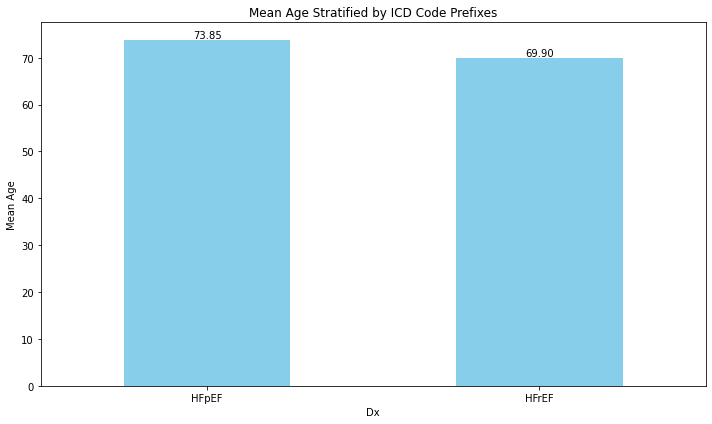

In [205]:
import matplotlib.pyplot as plt

# Assuming hf_ce_lab is your DataFrame
hf_ce_lab['dx'] = np.where(hf_ce_lab['icd_code'].str.startswith(('I502', '4282')), 'HFrEF', 'HFpEF')

# Calculate the mean values for each group
mean_values = hf_ce_lab.groupby('dx')['age'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = mean_values.plot(kind='bar', color='skyblue')
plt.xlabel('Dx')
plt.ylabel('Mean Age')
plt.title('Mean Age Stratified by ICD Code Prefixes')
plt.xticks(rotation=0)

# Add direct labels (values) on top of the bars
for bar, label in zip(ax.patches, mean_values.values):
    height = bar.get_height()
    ax.annotate(f'{label:.2f}', (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom')
    
plt.tight_layout()
plt.show()

<Figure size 720x432 with 0 Axes>

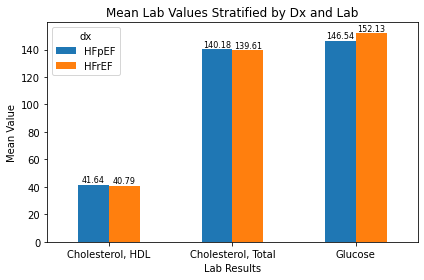

In [204]:
import matplotlib.pyplot as plt

# Calculate the mean values for each group, excluding 'probnp'
mean_values = hf_ce_lab[~hf_ce_lab['label_lab'].str.contains('pro')].groupby(['dx', 'label_lab'])['valuenum'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = mean_values.pivot(index='label_lab', columns='dx', values='valuenum').plot(kind='bar', rot=0)
plt.xlabel('Lab Results')
plt.ylabel('Mean Value')
plt.title('Mean Lab Values Stratified by Dx and Lab')
plt.legend(title='dx')

# Add direct labels (values) on top of the bars
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 0.1, f'{mean_values.iloc[i, 2]:.2f}',
        ha='center', va='bottom', fontsize=8, color='black'
    )

plt.tight_layout()
plt.show()

<Figure size 720x432 with 0 Axes>

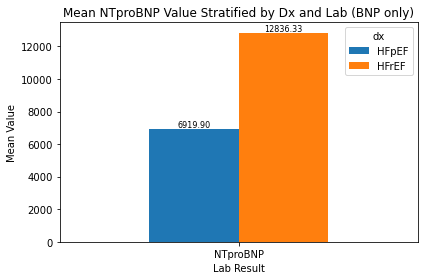

In [203]:

# Calculate the mean values for 'bnp' only
mean_bnp_values = hf_ce_lab[hf_ce_lab['label_lab'].str.contains('pro')].groupby(['dx', 'label_lab'])['valuenum'].mean().reset_index()

# Create a bar plot for 'bnp'
plt.figure(figsize=(10, 6))
ax = mean_bnp_values.pivot(index='label_lab', columns='dx', values='valuenum').plot(kind='bar', rot=0)
plt.xlabel('Lab Result')
plt.ylabel('Mean Value')
plt.title('Mean NTproBNP Value Stratified by Dx and Lab (BNP only)')
plt.legend(title='dx')

# Add direct labels (values) on top of the bars
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 0.1, f'{mean_bnp_values.iloc[i, 2]:.2f}',
        ha='center', va='bottom', fontsize=8, color='black'
    )

plt.tight_layout()
plt.show()


<Figure size 720x432 with 0 Axes>

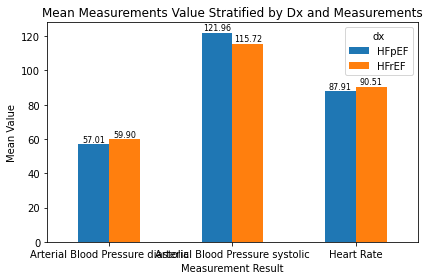

In [202]:
import matplotlib.pyplot as plt

# Calculate the mean values for 'bnp' only
mean_bnp_values = hf_ce_lab.groupby(['dx', 'label_ce'])['value'].mean().reset_index()

# Create a bar plot for 'bnp'
plt.figure(figsize=(10, 6))
ax = mean_bnp_values.pivot(index='label_ce', columns='dx', values='value').plot(kind='bar', rot=0)
plt.xlabel('Measurement Result')
plt.ylabel('Mean Value')
plt.title('Mean Measurements Value Stratified by Dx and Measurements')
plt.legend(title='dx')

# Add direct labels (values) on top of the bars
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 0.1, f'{mean_bnp_values.iloc[i, 2]:.2f}',
        ha='center', va='bottom', fontsize=8, color='black'
    )

plt.tight_layout()
plt.show()


<Figure size 864x432 with 0 Axes>

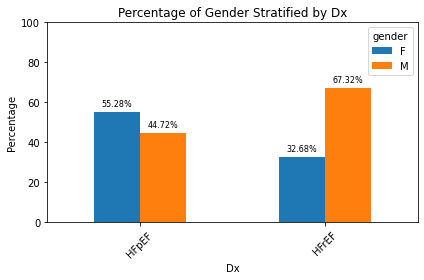

In [219]:
import matplotlib.pyplot as plt

# Calculate the percentage of 'gender' values stratified by 'dx'
percentage_values = (
    hf_ce_lab.groupby(['dx', 'gender'])['subject_id'].count() / hf_ce_lab.groupby('dx')['subject_id'].count() * 100
)
percentage_values = percentage_values.reset_index()

# Rename columns for clarity
percentage_values.columns = ['dx', 'gender', 'percentage']

# Create a bar plot for percentages stratified by 'dx'
plt.figure(figsize=(12, 6))
ax = percentage_values.pivot(index='dx', columns='gender', values='percentage').plot(kind='bar', stacked=False, rot=45)
plt.xlabel('Dx')
plt.ylabel('Percentage')
plt.title('Percentage of Gender Stratified by Dx')

# Add direct labels (values) on top of the bars for both genders
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 2, f'{height:.2f}%',
        ha='center', va='bottom', fontsize=8, color='black'
    )

# Set the y-axis limit to 100%
plt.ylim(0, 100)

plt.tight_layout()
plt.show()
